# Explore here

In [1]:
import pandas as pd
#copiamos la direccion "raw" de la data de entrenamiento y la data de prueba del ejercicio anterior del  árbol de decisión
train_data = pd.read_csv("https://raw.githubusercontent.com/diegomacaya/arbol_de_decision/refs/heads/main/data/processed/entrenamiento_limpio.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/diegomacaya/arbol_de_decision/refs/heads/main/data/processed/prueba_limpio.csv")

train_data.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.0,84.0,0.0,0.0,0.304,21.0,0
1,9.0,112.0,0.0,28.2,1.282,50.0,1
2,1.0,139.0,83.0,28.7,0.654,22.0,0
3,0.0,161.0,0.0,21.9,0.254,65.0,0
4,6.0,134.0,370.0,46.2,0.238,46.0,1


In [2]:
X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]

In [3]:
#dado que es un problema de clasificacion se selecciona en randomforestclassifier, porque lo que queremos predecir es si la persona tiene diabetes o no

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

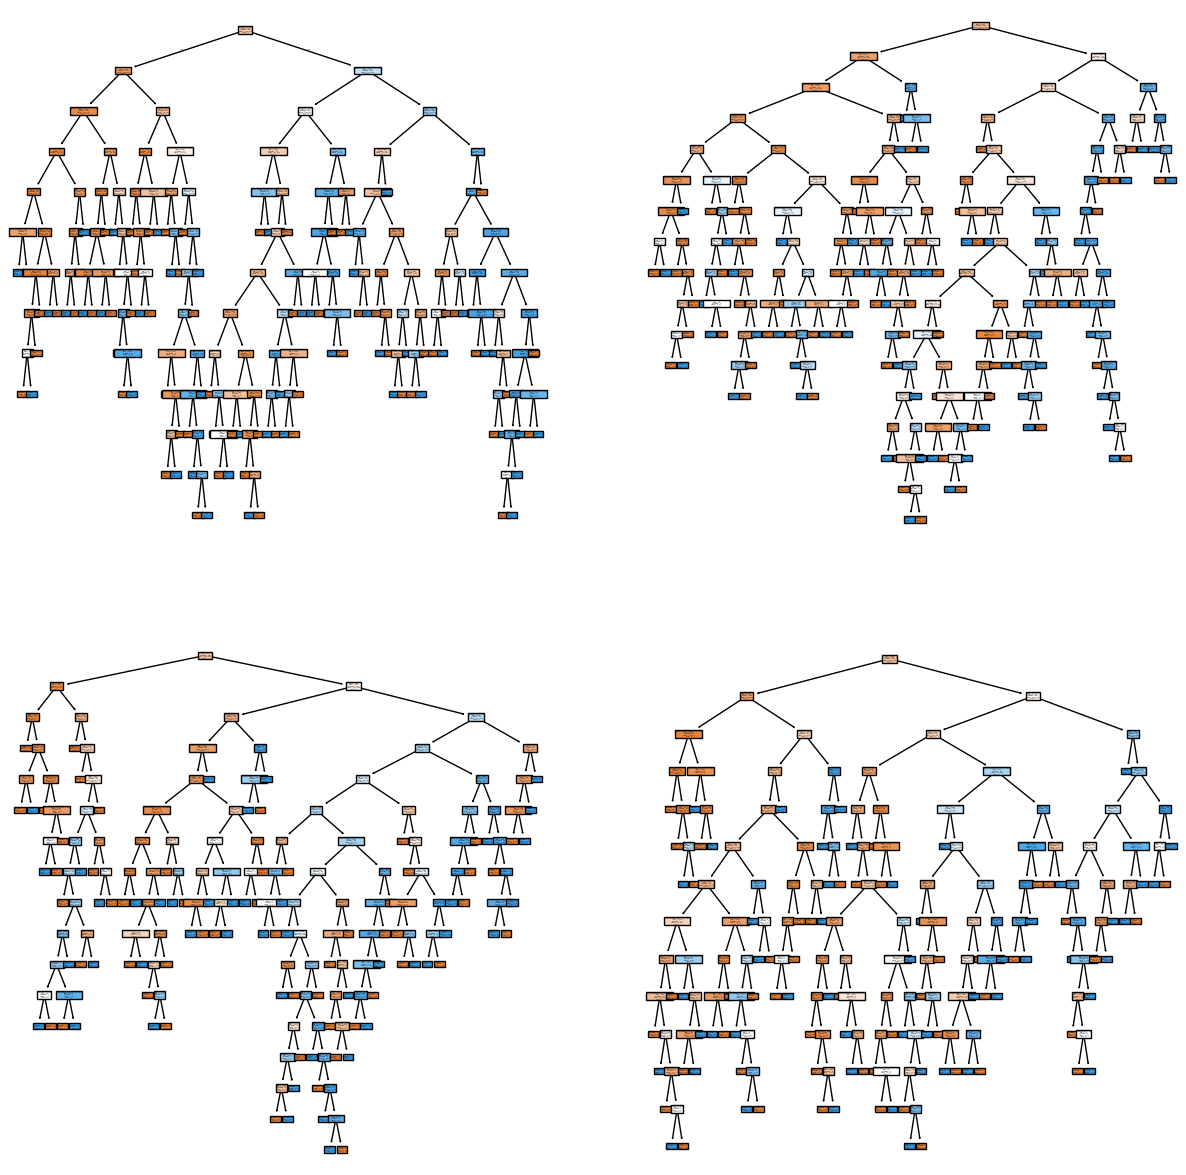

In [4]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# We show the first 4 trees out of the 100 generated (default)
tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [5]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [6]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7337662337662337

In [7]:
from sklearn.model_selection import GridSearchCV
#la grilla es un diccionario {} que contiene los hiperparámetros a optimizar
grid = {
    'n_estimators' : [50,100,150,200], #cantidad de arboles por cada modelo
    'bootstrap' : [True,False], #se hace el muestreo con o sin remmplazo
    'max_depth' : [None,5,7,10], #que tan grandes son los áreboles
    
}
#resultados de grilla, para que mejore a través del parametro de accuracy
grid_result = GridSearchCV(model,grid,scoring='accuracy',cv=5)
grid_result.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 5, 7, 10],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [8]:
best_model = grid_result.best_estimator_

y_best_pred = best_model.predict(X_test)

In [9]:
print (f'La precisión es de: {accuracy_score(y_best_pred,y_test)}')

La precisión es de: 0.7597402597402597


In [10]:
from pickle import dump

dump(model, open("../models/ranfor_classifier_nestimators-50_42.sav", "wb"))